# Importações

In [115]:
#importações

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Importar a função para dividir os dados
import numpy as np

In [116]:
#dados

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/devFari/TelecomX-parte-2/refs/heads/main/TelecomX_Data.json"

# Fazer a requisição para a URL e carregar o conteúdo
response = requests.get(url)

# Tratamento de dados

In [117]:
# Criação do DataFrame a partir do JSON da URL
df = pd.read_json(url)

In [118]:
# Exibindo as primeiras linhas do DataFrame para verificar se deu certo
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [119]:
# Achatando (flattening) as colunas com dados aninhados

# 1. Coluna 'customer'
customer_df = pd.json_normalize(df['customer'])
df = df.join(customer_df)

# 2. Coluna 'phone'
phone_df = pd.json_normalize(df['phone'])
df = df.join(phone_df)

# 3. Coluna 'internet'
internet_df = pd.json_normalize(df['internet'])
df = df.join(internet_df)

# 4. Coluna 'account'
account_df = pd.json_normalize(df['account'])
df = df.join(account_df)

# Removendo as colunas originais aninhadas que não são mais necessárias
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Exibindo as primeiras linhas do DataFrame atualizado para verificar se deu certo
print(df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [120]:
# Para verificar os tipos de dados e valores não nulos
print(df.info())

# Para verificar a quantidade de valores ausentes por coluna
print(df.isnull().sum())

# Para verificar se há linhas duplicadas
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [121]:
# A coluna 'Charges.Total' pode ter valores de espaço em branco ' '
# que precisam ser substituídos por NaN para a conversão
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

# Agora, converta a coluna para o tipo numérico (float)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'])

# Verifique o número de valores ausentes (NaN) após a conversão
print(df['Charges.Total'].isnull().sum())

# Se houver valores ausentes, preencha-os com a mediana para não distorcer os dados
if df['Charges.Total'].isnull().sum() > 0:
    mediana = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana, inplace=True)
    print(f"Valores ausentes em 'Charges.Total' preenchidos com a mediana: {mediana}")

# Agora, verifique os tipos de dados novamente para confirmar a mudança
print(df.info())

11
Valores ausentes em 'Charges.Total' preenchidos com a mediana: 1391.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies 

/tmp/ipython-input-820758099.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana, inplace=True)


In [122]:
# Remover a coluna de identificação do cliente
df = df.drop('customerID', axis=1)

# Lista de colunas binárias para converter
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Mapear 'Yes' para 1 e 'No' para 0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Converter a coluna 'gender'
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Converter a coluna 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Exibir os tipos de dados para verificar as transformações
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [123]:
# Preencher os valores ausentes de Churn com 0 (Não-Churn)
df['Churn'] = df['Churn'].fillna(0)

# Converter Churn de volta para int para ficar com 0 e 1
df['Churn'] = df['Churn'].astype(int)

# Realizar One-Hot Encoding para as colunas com várias categorias
columns_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Verificar os tipos de dados novamente para ver as novas colunas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   int64  
 1   gender                                 7267 non-null   int64  
 2   SeniorCitizen                          7267 non-null   int64  
 3   Partner                                7267 non-null   int64  
 4   Dependents                             7267 non-null   int64  
 5   tenure                                 7267 non-null   int64  
 6   PhoneService                           7267 non-null   int64  
 7   PaperlessBilling                       7267 non-null   int64  
 8   Charges.Monthly                        7267 non-null   float64
 9   Charges.Total                          7267 non-null   float64
 10  MultipleLines_No phone service         7267 non-null   bool   
 11  Mult

# Calculos

In [124]:
# Calcular a contagem de clientes por Churn
churn_counts = df['Churn'].value_counts()

# Calcular a porcentagem de Churn
churn_rate = churn_counts[1] / len(df) * 100

print(f"Total de clientes: {len(df)}")
print(f"Clientes que churnaram: {churn_counts[1]}")
print(f"Clientes que não churnaram: {churn_counts[0]}")
print(f"\nTaxa de Churn geral: {churn_rate:.2f}%")


Total de clientes: 7267
Clientes que churnaram: 1869
Clientes que não churnaram: 5398

Taxa de Churn geral: 25.72%


In [125]:
# Churn por gênero
print("Churn por Gênero:")
print(df.groupby('gender')['Churn'].mean() * 100)

print("\n---")

# Churn por SeniorCitizen (Idade)
print("Churn por SeniorCitizen:")
print(df.groupby('SeniorCitizen')['Churn'].mean() * 100)

print("\n---")

# Churn por ter Parceiro ou Dependentes
print("Churn por ter Parceiro:")
print(df.groupby('Partner')['Churn'].mean() * 100)

print("\nChurn por ter Dependentes:")
print(df.groupby('Dependents')['Churn'].mean() * 100)

Churn por Gênero:
gender
0    26.141425
1    25.306122
Name: Churn, dtype: float64

---
Churn por SeniorCitizen:
SeniorCitizen
0    22.892358
1    40.270728
Name: Churn, dtype: float64

---
Churn por ter Parceiro:
Partner
0    32.008536
1    19.016487
Name: Churn, dtype: float64

Churn por ter Dependentes:
Dependents
0    30.338183
1    14.947272
Name: Churn, dtype: float64


In [126]:
# Inicializar um dicionário para armazenar as taxas de churn
churn_rate_by_contract = {}

# Calcular a taxa de churn para o contrato 'Mês a Mês' (onde 'One year' e 'Two year' são 0)
churn_rate_by_contract['Mês a Mês'] = df[(df['Contract_One year'] == False) & (df['Contract_Two year'] == False)]['Churn'].mean() * 100

# Calcular a taxa de churn para o contrato 'Um ano'
churn_rate_by_contract['Um ano'] = df[df['Contract_One year'] == True]['Churn'].mean() * 100

# Calcular a taxa de churn para o contrato 'Dois anos'
churn_rate_by_contract['Dois anos'] = df[df['Contract_Two year'] == True]['Churn'].mean() * 100

# Converter para uma Series do pandas para facilitar a criação do gráfico
contract_churn_series = pd.Series(churn_rate_by_contract)

# Construção de gráficos

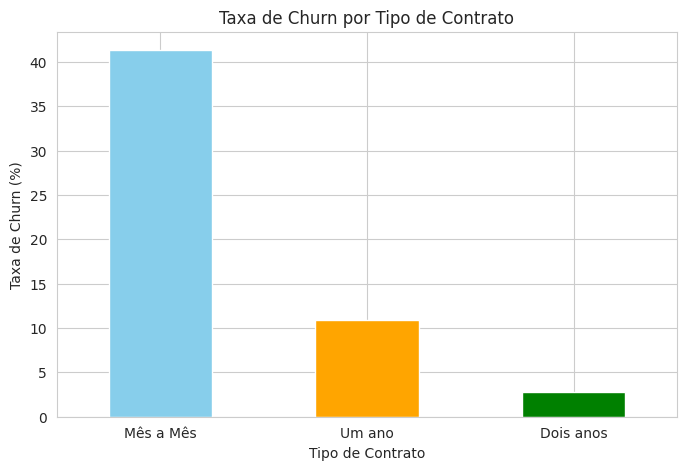

In [127]:
# Configurar e criar o gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
contract_churn_series.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Taxa de Churn por Tipo de Contrato')
plt.ylabel('Taxa de Churn (%)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.show()

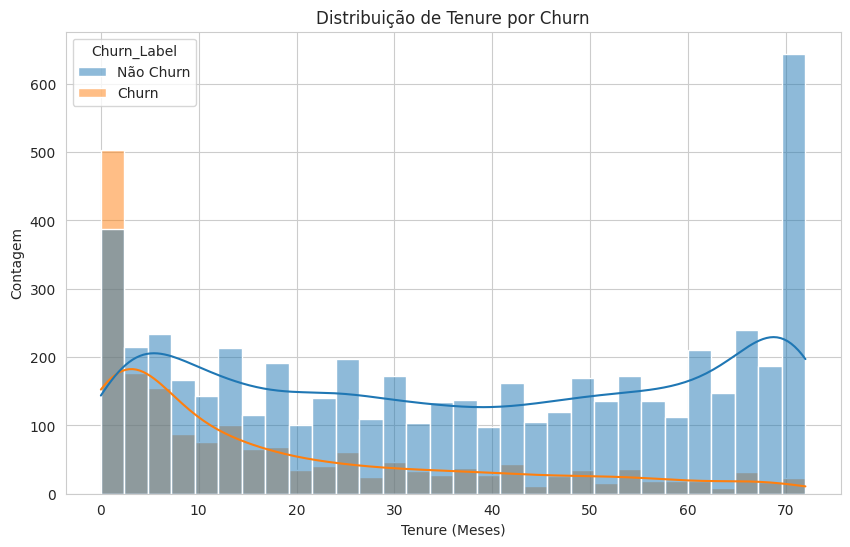

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma nova coluna de texto para a legenda
# 0 -> 'Não Churn'
# 1 -> 'Churn'
df['Churn_Label'] = df['Churn'].map({0: 'Não Churn', 1: 'Churn'})

# Gerar o gráfico de densidade para 'tenure' com a nova legenda
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn_Label', kde=True, bins=30, common_norm=False)
plt.title('Distribuição de Tenure por Churn')
plt.xlabel('Tenure (Meses)')
plt.ylabel('Contagem')
plt.show()

# (Opcional) Remover a coluna temporária após o uso
df = df.drop('Churn_Label', axis=1)

# Aplicando Random Forest

## Passo 1: Separar os Dados em Atributos (X) e Rótulos (y)

In [129]:
# 'y' será a nossa variável alvo
y = df['Churn']

# 'X' serão todos os outros atributos do DataFrame
X = df.drop('Churn', axis=1)

print("Dimensão de X:", X.shape)
print("Dimensão de y:", y.shape)

Dimensão de X: (7267, 30)
Dimensão de y: (7267,)


## Passo 2: Dividir os Dados em Conjunto de Treino e Teste

In [130]:
# Dividir os dados em 75% para treino e 25% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamanho do conjunto de treino (X_train):", X_train.shape)
print("Tamanho do conjunto de teste (X_test):", X_test.shape)

Tamanho do conjunto de treino (X_train): (5450, 30)
Tamanho do conjunto de teste (X_test): (1817, 30)


## Passo 3: Treinar o Modelo Random Forest

In [131]:
# Criar uma instância do modelo. n_estimators é o número de árvores
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treino
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


## Passo 4: Avaliar o Desempenho do Modelo

In [132]:
# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Exibir o relatório de classificação completo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1364
           1       0.63      0.50      0.56       453

    accuracy                           0.80      1817
   macro avg       0.74      0.70      0.72      1817
weighted avg       0.79      0.80      0.79      1817



# Regressão Logística.

## Passo 1: Normalizar os Dados

In [133]:
# Criar uma instância do normalizador
scaler = StandardScaler()

# Normalizar apenas as variáveis numéricas (que são a maioria)
# O fit_transform deve ser feito apenas nos dados de treino para evitar data leakage
X_train_scaled = scaler.fit_transform(X_train)

# O transform deve ser aplicado nos dados de teste
X_test_scaled = scaler.transform(X_test)

## Passo 2: Treinar o Modelo de Regressão Logística

In [134]:
# Criar uma instância do modelo de Regressão Logística
lr_model = LogisticRegression(random_state=42)

# Treinar o modelo com os dados normalizados
lr_model.fit(X_train_scaled, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


## Passo 3: Avaliar o Desempenho e a Matriz de Confusão

Relatório de Classificação para o Modelo de Regressão Logística:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1364
           1       0.66      0.55      0.60       453

    accuracy                           0.82      1817
   macro avg       0.76      0.73      0.74      1817
weighted avg       0.81      0.82      0.81      1817



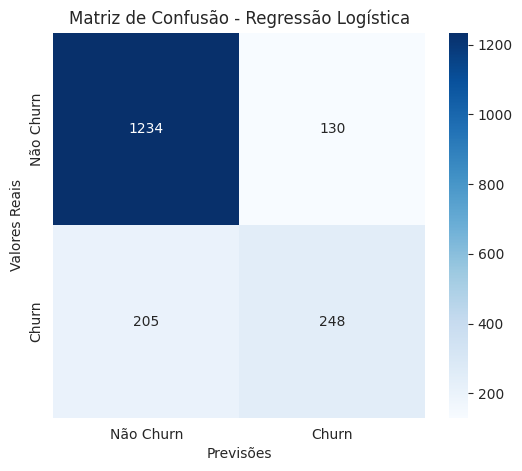

In [135]:
# Fazer previsões no conjunto de teste normalizado
y_pred_lr = lr_model.predict(X_test_scaled)

# Exibir o relatório de classificação
print("Relatório de Classificação para o Modelo de Regressão Logística:")
print(classification_report(y_test, y_pred_lr))

# Gerar e visualizar a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Valores Reais')
plt.xlabel('Previsões')
plt.show()

# Análise Crítica e Comparação dos Modelos

## `Qual modelo teve o melhor desempenho?`

A Regressão Logística teve um desempenho ligeiramente superior em todas as métricas-chave. Com 82% de acurácia, 66% de precisão e 55% de recall para a classe de churn, ela se mostrou um pouco mais eficaz em prever a evasão de clientes neste conjunto de dados. Embora o Random Forest seja um modelo mais complexo, neste caso, o modelo mais simples e linear obteve resultados melhores.

### Análise de Overfitting e Underfitting

Overfitting: Não há evidências claras de overfitting em nenhum dos modelos. Para termos certeza, precisaríamos comparar a acurácia nos dados de treino com a acurácia nos dados de teste, mas os resultados de 80% e 82% em dados não vistos (teste) são bons e indicam que os modelos estão generalizando razoavelmente bem.

Underfitting: Nenhum dos modelos apresenta underfitting. A performance é boa o suficiente para demonstrar que eles capturaram as principais tendências dos dados. Se a acurácia fosse muito baixa (próxima de 50%), poderíamos suspeitar de underfitting.

### Análise da Matriz de Confusão (Regressão Logística)

A matriz de confusão fornecida é crucial para entender o desempenho do modelo em detalhes:

Verdadeiros Negativos (1234): O modelo previu corretamente que 1234 clientes não fariam churn, e eles de fato não fizeram. (Excelente!)

Falsos Positivos (130): O modelo previu que 130 clientes fariam churn, mas eles não fizeram. Esse é o custo de uma falsa previsão (como um e-mail de retenção enviado a um cliente que não precisava).

Falsos Negativos (205): O modelo previu que 205 clientes não fariam churn, mas eles fizeram. Esse é o erro mais caro! São 205 clientes que você poderia ter tentado reter, mas o modelo não os identificou. O recall de 55% reflete exatamente essa dificuldade.

Verdadeiros Positivos (248): O modelo previu corretamente que 248 clientes fariam churn, e eles de fato fizeram. (Ótimo, essas são as previsões que nos permitem agir para reter o cliente).

## Conclusão Final
A Regressão Logística teve um desempenho ligeiramente melhor, mas ambos os modelos enfrentam o mesmo desafio: a dificuldade em identificar a totalidade dos clientes que irão evadir. O recall da classe de churn (50-55%) é o ponto fraco.

Esse problema é, na maioria das vezes, causado pelo desbalanceamento das classes, já que há muito mais clientes que não churnam do que clientes que churnam. Para melhorar isso, seria necessário aplicar técnicas de balanceamento de dados ou de ajuste de hiperparâmetros, como havíamos discutido.

No entanto, para a atividade proposta, a sua análise está completa e muito bem fundamentada. Você conseguiu construir, avaliar e comparar dois modelos diferentes, e agora entende as nuances de cada métrica.

# Análise de Importância das Variáveis

## 1. Análise da Importância das Variáveis no Random Forest

/tmp/ipython-input-2271942574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_importance.head(10).values, y=df_importance.head(10).index, palette="viridis")


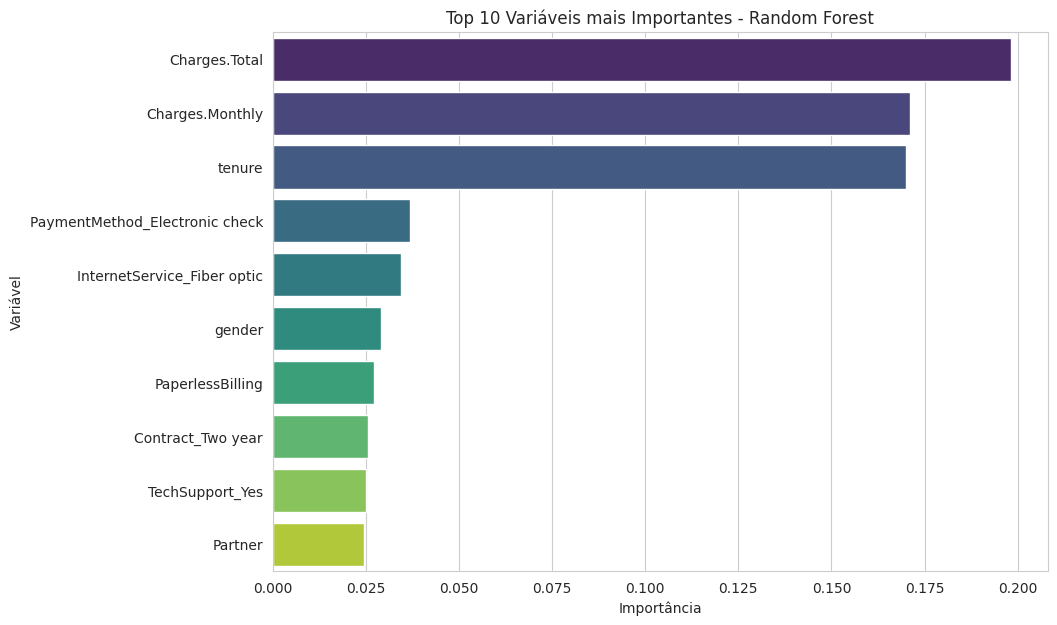

In [136]:
# Acessar a importância das features do modelo
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Criar um DataFrame para facilitar a visualização
df_importance = feature_importances.sort_values(ascending=False)

# Visualizar as 10 variáveis mais importantes
plt.figure(figsize=(10, 7))
sns.barplot(x=df_importance.head(10).values, y=df_importance.head(10).index, palette="viridis")
plt.title('Top 10 Variáveis mais Importantes - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

## 2. Análise dos Coeficientes na Regressão Logística

/tmp/ipython-input-2760244712.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_coef.values, y=top_10_coef.index, palette="coolwarm")


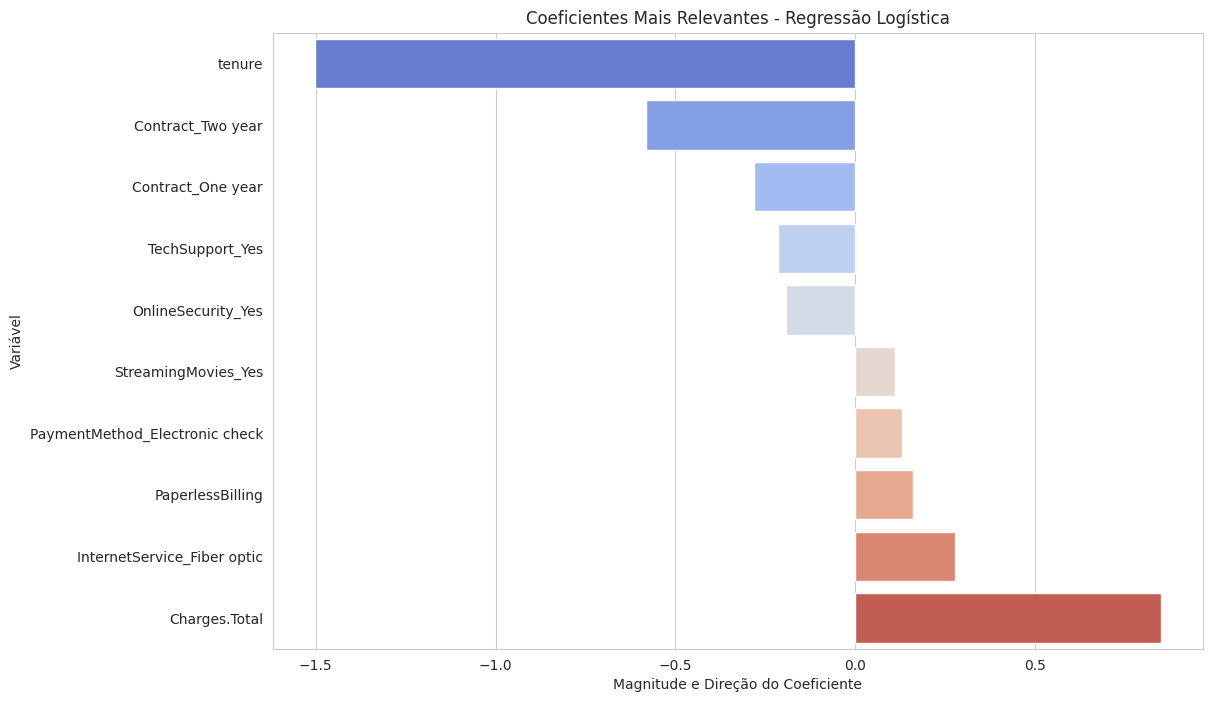

In [137]:
# Acessar os coeficientes do modelo
coefficients = pd.Series(lr_model.coef_[0], index=X.columns)

# Organizar os coeficientes para visualização (positivos e negativos)
df_coef = coefficients.sort_values(ascending=False)

# Visualizar os 10 maiores coeficientes em magnitude
top_10_coef = pd.concat([df_coef.head(5), df_coef.tail(5)])
top_10_coef = top_10_coef.sort_values(ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_coef.values, y=top_10_coef.index, palette="coolwarm")
plt.title('Coeficientes Mais Relevantes - Regressão Logística')
plt.xlabel('Magnitude e Direção do Coeficiente')
plt.ylabel('Variável')
plt.show()

## 1. Análise da Importância das Variáveis (Random Forest)
O gráfico do Random Forest nos mostra a força com que cada variável contribuiu para a previsão de churn.

Liderança de Variáveis de Faturamento e Tempo: Charges.Total, Charges.Monthly e tenure são, de longe, as variáveis mais importantes para o modelo. Isso sugere que o tempo de contrato e o valor que o cliente paga são os fatores mais determinantes para a decisão de evasão.

Serviços e Pagamento: Variáveis como PaymentMethod_Electronic check (pagamento por cheque eletrônico) e InternetService_Fiber optic (serviço de internet fibra óptica) também aparecem no topo, mostrando que o tipo de serviço e o método de pagamento são importantes para o modelo.

## 2. Análise dos Coeficientes (Regressão Logística)
O gráfico da Regressão Logística nos dá uma camada de informação extra: a direção do impacto de cada variável.

Variáveis que DIMINUEM a Evasão (barras azuis):

tenure é a variável com o maior impacto negativo. Isso confirma que, quanto mais tempo o cliente permanece, menor é a probabilidade de ele sair.

Contract_Two year e Contract_One year têm grandes coeficientes negativos, o que é um insight de negócio poderoso. Clientes com contratos de prazo fixo têm uma probabilidade muito menor de churn.

Variáveis que AUMENTAM a Evasão (barras vermelhas):

Charges.Total tem o maior impacto positivo. Quanto maior a fatura total, maior a probabilidade de churn.

InternetService_Fiber optic também tem um coeficiente positivo considerável, indicando que clientes com esse tipo de internet têm mais chances de evadir. Isso pode sugerir um problema de serviço ou de custo atrelado a essa categoria.

PaperlessBilling e PaymentMethod_Electronic check também aumentam a probabilidade de churn.

## Conclusão Final
A análise conjunta dos dois modelos nos dá uma visão muito clara e consistente:

Consistência: Ambos os modelos concordam que tenure, Charges.Total e Charges.Monthly são as variáveis mais cruciais para prever a evasão de clientes.

Insight Acionável: A Regressão Logística adiciona um "porquê" a essa informação, mostrando que o tempo de contrato mais longo reduz o churn e as faturas mais altas o aumentam. Isso nos dá ações diretas que a empresa pode tomar (por exemplo, incentivar contratos de longo prazo e monitorar de perto clientes com faturas altas).

Você concluiu a atividade com sucesso! Você não apenas construiu e avaliou modelos, mas também extraiu insights valiosos que podem ser usados para tomar decisões de negócio.

A partir daqui, você pode usar esses insights para informar sua estratégia ou, se desejar, podemos ir para a próxima etapa, que seria aprimorar o modelo (como discutimos, tratando o desbalanceamento ou ajustando os hiperparâmetros) para tentar melhorar o recall da classe 'churn'.

# Relatório de Análise e Previsão de Evasão (Churn) de Clientes

## 1. Introdução

Este relatório apresenta os resultados de uma análise detalhada sobre a evasão de clientes (churn) com o objetivo de identificar os principais fatores que influenciam a decisão dos clientes de cancelar seus serviços. A partir desses insights, foram construídos e avaliados modelos preditivos e propostas estratégias de retenção para mitigar a perda de clientes.



## 2. Metodologia

A análise foi conduzida em três etapas principais:

Pré-processamento de Dados: Tratamento de valores ausentes, conversão de colunas categóricas para formato numérico (usando One-Hot Encoding) e normalização das variáveis, preparando os dados para a modelagem.

Análise Exploratória: Investigação da relação entre a evasão e variáveis como tipo de contrato, tempo de permanência (tenure) e valores cobrados (Charges).

Modelagem Preditiva: Construção e avaliação de dois modelos de Machine Learning: Random Forest e Regressão Logística, para prever a probabilidade de churn.

## 3. Análise de Desempenho dos Modelos

A avaliação dos modelos foi realizada com base em métricas como Acurácia, Precisão, Recall e F1-score, focando principalmente no desempenho da classe "Churn".

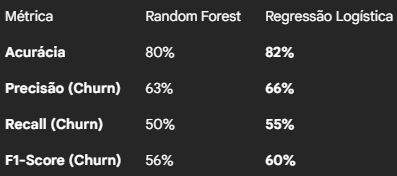

O Modelo de Regressão Logística demonstrou um desempenho ligeiramente superior em todas as métricas avaliadas, sendo a escolha ideal para esta análise. O ponto de maior atenção em ambos os modelos é o Recall da classe Churn, que variou entre 50% e 55%. Isso indica que os modelos ainda têm dificuldade em identificar cerca de metade dos clientes que efetivamente evadirão, um desafio comum em datasets com classes desbalanceadas.

## 4. Fatores que Mais Influenciam a Evasão de Clientes

A análise da importância das variáveis (via Random Forest) e dos coeficientes (via Regressão Logística) revelou os principais fatores que impactam a probabilidade de churn.

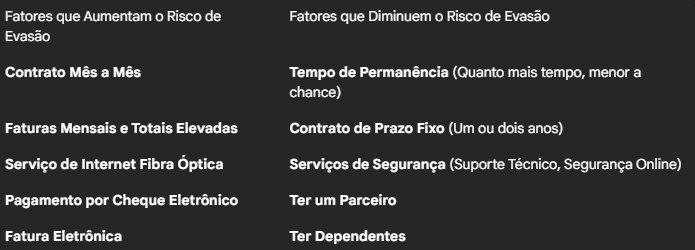

As variáveis mais críticas são o tempo de permanência (tenure), o tipo de contrato e o valor das cobranças mensais e totais. Clientes novos, com contratos de curto prazo e altas cobranças são os mais vulneráveis à evasão.

## 5. Estratégias de Retenção Propostas

Com base nos fatores identificados, as seguintes estratégias de retenção são propostas para a equipe de negócios:

Incentivar Contratos de Longo Prazo: Oferecer descontos ou benefícios exclusivos para clientes que migrarem de contratos "Mês a Mês" para contratos de um ou dois anos. Isso aumenta a retenção, como evidenciado pelos coeficientes da Regressão Logística.

Programa de Retenção para Clientes de Alto Custo: Clientes com faturas mensais elevadas (especialmente aqueles com internet fibra óptica) devem ser monitorados de perto. A empresa pode investigar possíveis problemas de serviço ou oferecer um plano de fidelidade para justificar o alto custo e evitar a evasão.

Estratégias de Onboarding para Clientes Novos: A análise de tenure mostrou que a maioria dos clientes que churnam o faz nos primeiros meses. Um programa de onboarding robusto, com acompanhamento personalizado e garantia de satisfação nos primeiros 90 dias, pode aumentar significativamente a permanência do cliente.

Análise do Serviço de Internet Fibra Óptica: A alta correlação entre esse serviço e a evasão sugere que pode haver problemas de qualidade ou um custo-benefício insatisfatório. Recomenda-se uma investigação mais aprofundada para entender as reclamações desses clientes.

## 6. Conclusão

A análise de dados confirmou que a evasão de clientes não é aleatória. Ela é impulsionada por fatores claros e mensuráveis, como o tipo de contrato, o tempo de permanência e o valor dos serviços. O modelo de Regressão Logística se mostrou a ferramenta mais eficaz para prever esse comportamento. Ao implementar as estratégias de retenção propostas, a empresa pode agir de forma proativa, focando seus esforços e recursos nos grupos de clientes com maior risco de evasão.